# Задание 1
## Импорт Iris, помещение данных в объект DataFrame

In [1]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_f = pd.read_csv(url, names=['sepal length (cm)','sepal width (cm)',
                                 'petal length (cm)','petal width (cm)','name'])
iris_f.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Вычисление корреляций
### По всей таблице:

In [2]:
iris_f.corr(numeric_only=float)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


### Для класса Iris-setosa:

In [3]:
iris_f[iris_f['name'] == 'Iris-setosa'].corr(numeric_only=float)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.746780,0.263874,0.279092
sepal width (cm),0.746780,1.000000,0.176695,0.279973
petal length (cm),0.263874,0.176695,1.000000,0.306308
petal width (cm),0.279092,0.279973,0.306308,1.000000


### Для класса Iris-versicolor:

In [4]:
iris_f[iris_f['name'] == 'Iris-versicolor'].corr(numeric_only=float)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.525911,0.754049,0.546461
sepal width (cm),0.525911,1.000000,0.560522,0.663999
petal length (cm),0.754049,0.560522,1.000000,0.786668
petal width (cm),0.546461,0.663999,0.786668,1.000000


### Для класса Iris-virginica:

In [5]:
iris_f[iris_f['name'] == 'Iris-virginica'].corr(numeric_only=float)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


## Распределения классов на всех парах переменных

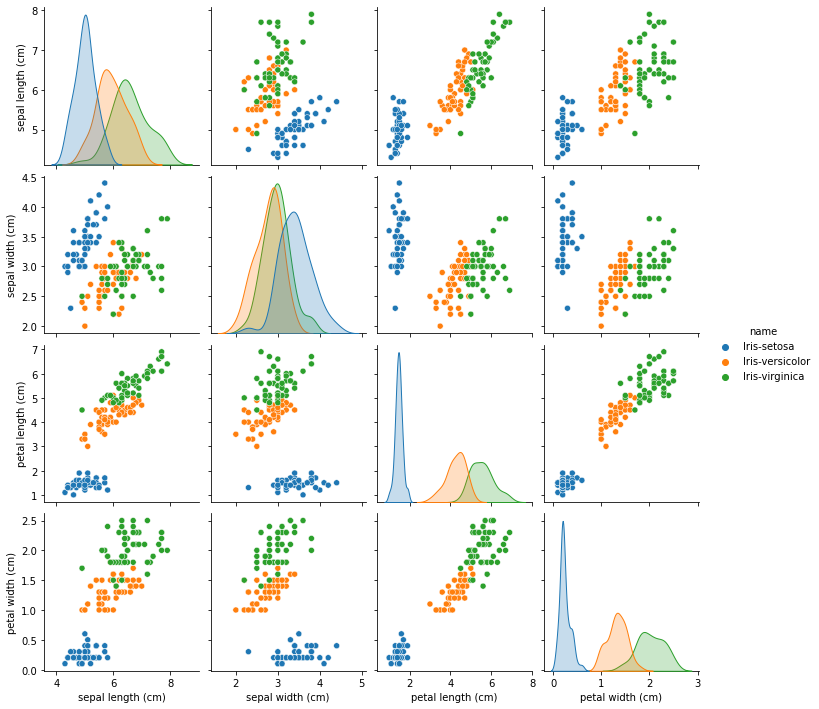

In [6]:
import seaborn as sns

sns.pairplot(iris_f[['sepal length (cm)','sepal width (cm)',
                     'petal length (cm)','petal width (cm)','name']], hue = 'name')

# Задание 2
Из четырех переменных выберем две: sepal length и sepal width.

## Функция визуализации

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, target_names, classifier, resolution=0.02):
    # настроить генератор маркеров и палитру
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # вывести поверхность решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # показать образцы классов
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], alpha=.8, color=color, label=target_name)

## 1. Решаем методами линейного и квадратичного дискриминанта

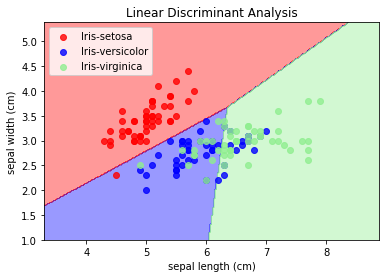

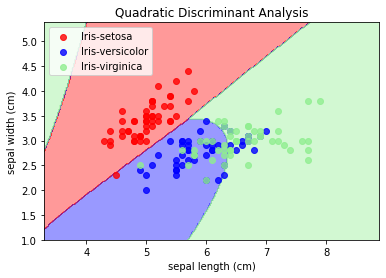

In [8]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X1 = iris_f[['sepal length (cm)','sepal width (cm)']].to_numpy()
names = iris_f['name'].to_numpy()
names[names == 'Iris-setosa'] = 0
names[names == 'Iris-versicolor'] = 1
names[names == 'Iris-virginica'] = 2
y1 = names.astype('int')

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

model1 = LinearDiscriminantAnalysis()
model1.fit(X1, y1)

plot_decision_regions(X1, y1, target_names, classifier=model1)
plt.title("Linear Discriminant Analysis")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(loc='upper left')
plt.show()


from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X2 = iris_f[['sepal length (cm)','sepal width (cm)']].to_numpy()
names = iris_f['name'].to_numpy()
names[names == 'Iris-setosa'] = 0
names[names == 'Iris-versicolor'] = 1
names[names == 'Iris-virginica'] = 2
y2 = names.astype('int')

model2 = QuadraticDiscriminantAnalysis()
model2.fit(X2, y2)

plot_decision_regions(X2, y2, target_names, classifier=model2)
plt.title("Quadratic Discriminant Analysis")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(loc='upper left')
plt.show()

Как видно, ошибка классификации примерно одинакова в методах линейного и квадратичного дискриминанта.

## 2. Решаем методом логистической регрессии

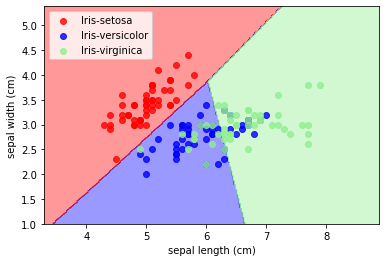

In [9]:
from sklearn.linear_model import LogisticRegression

X = iris_f[['sepal length (cm)','sepal width (cm)']].to_numpy()
names = iris_f['name'].to_numpy()
names[names == 'Iris-setosa'] = 0
names[names == 'Iris-versicolor'] = 1
names[names == 'Iris-virginica'] = 2
y = names.astype('int')

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X, y)

plot_decision_regions(X, y, target_names, classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(loc='upper left')
plt.show()

## 3. Решаем методом SVM (линейное и квадратичное ядро)

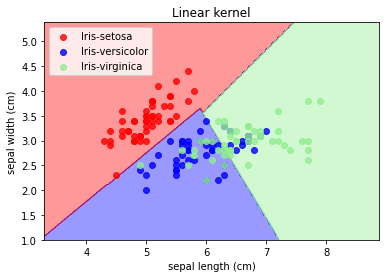

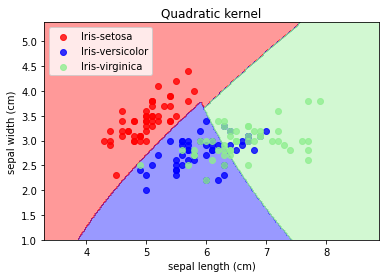

In [10]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

X1 = iris_f[['sepal length (cm)','sepal width (cm)']].to_numpy()
names = iris_f['name'].to_numpy()
names[names == 'Iris-setosa'] = 0
names[names == 'Iris-versicolor'] = 1
names[names == 'Iris-virginica'] = 2
y1 = names.astype('int')

C = 1.0

model1 = svm.SVC(kernel="linear", C=C)
model1.fit(X1, y1)

plot_decision_regions(X1, y1, target_names, classifier=model1)
plt.title("Linear kernel")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(loc='upper left')
plt.show()


X2 = iris_f[['sepal length (cm)','sepal width (cm)']].to_numpy()
names = iris_f['name'].to_numpy()
names[names == 'Iris-setosa'] = 0
names[names == 'Iris-versicolor'] = 1
names[names == 'Iris-virginica'] = 2
y2 = names.astype('int')

model2 = svm.SVC(kernel="poly", degree=2, gamma="auto", C=C)
model2.fit(X2, y2)

plot_decision_regions(X2, y2, target_names, classifier=model2)
plt.title("Quadratic kernel")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(loc='upper left')
plt.show()

Кроме методов дискриминантного анализа, остальные безошибочно отделяют класс Iris-setosa от других классов. Метод логистической регрессии допускает немного меньше ошибок при классификации Iris-virginica.
Исходя из графиков распределения классов на всех парах переменных, наименее разделимые классы - Iris-versicolor и Iris-virginica.

# Задание 3
## Построение линейного дискриминанта на всех переменных

Error = 0.03


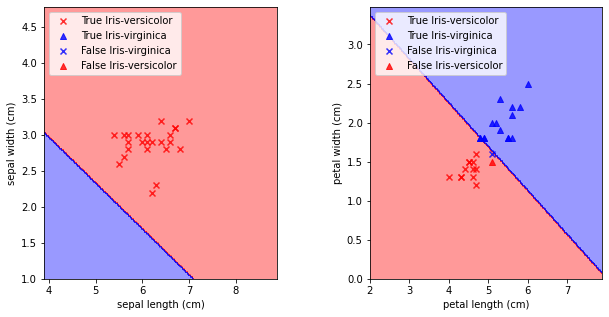

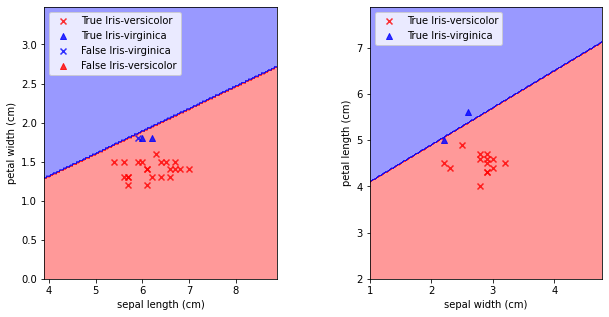

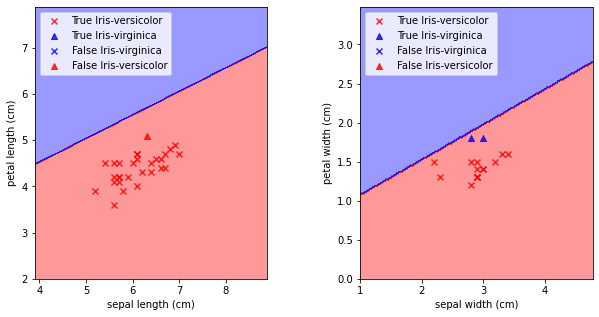

In [11]:
from collections import Counter
import random

classes = iris_f[(iris_f['name'] != 'Iris-setosa') & (iris_f['name'] != 0)]
X = classes[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].to_numpy()
names = classes['name'].to_numpy()
names[names == 'Iris-versicolor'] = 1
names[names == 'Iris-virginica'] = 2
y = names.astype('int')

target_names = ['Iris-versicolor', 'Iris-virginica']

model = LinearDiscriminantAnalysis()
model.fit(X, y)

markers = ('x', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

resolution = 0.02
acc = 0.3

#x1 = X[random.randint(0, X.shape[0] - 1), 0]
#x2 = X[random.randint(0, X.shape[0] - 1), 1]
#x3 = X[random.randint(0, X.shape[0] - 1), 2]
#x4 = X[random.randint(0, X.shape[0] - 1), 3]

x1 = Counter(X[:, 0]).most_common(1)[0][0]
x2 = Counter(X[:, 1]).most_common(1)[0][0]
x3 = Counter(X[:, 2]).most_common(1)[0][0]
x4 = Counter(X[:, 3]).most_common(1)[0][0]

# вывести поверхность решения
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x3_min, x3_max = X[:, 2].min() - 1, X[:, 2].max() + 1
x4_min, x4_max = X[:, 3].min() - 1, X[:, 3].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                 np.arange(x2_min, x2_max, resolution))
xx3, xx4 = np.meshgrid(np.arange(x3_min, x3_max, resolution),
                                 np.arange(x4_min, x4_max, resolution))

Z = model.predict(np.array([xx1.ravel(), xx2.ravel(), np.array([x3 for i in range(xx1.ravel().size)]),
                            np.array([x4 for i in range(xx1.ravel().size)])]).T)
Z = Z.reshape(xx1.shape)

figure1, axis1 = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
figure1.set_size_inches(10, 5)

axis1[0].contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
axis1[0].set_xlim(xx1.min(), xx1.max())
axis1[0].set_ylim(xx2.min(), xx2.max())

y_p = model.predict(X)

# показать образцы классов
for i, target_name in zip([1, 2], target_names):
    axis1[0].scatter(X[np.where((y == i) & (y_p == i) & (abs(X[:, 2] - x3) <= acc) & (abs(X[:, 3] - x4) <= acc)), 0], 
                     X[np.where((y == i) & (y_p == i) & (abs(X[:, 2] - x3) <= acc) & (abs(X[:, 3] - x4) <= acc)), 1],
                     alpha=.8, color=colors[i-1], marker=markers[i-1], label='True '+str(target_name))
axis1[0].scatter(X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 2] - x3) <= acc) & (abs(X[:, 3] - x4) <= acc)), 0], 
                     X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 2] - x3) <= acc) & (abs(X[:, 3] - x4) <= acc)), 1],
                     alpha=.8, color=colors[1], marker=markers[0], label='False '+str(target_names[1]))
axis1[0].scatter(X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 2] - x3) <= acc) & (abs(X[:, 3] - x4) <= acc)), 0],
                     X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 2] - x3) <= acc) & (abs(X[:, 3] - x4) <= acc)), 1],
                     alpha=.8, color=colors[0], marker=markers[1], label='False '+str(target_names[0]))

axis1[0].set_xlabel('sepal length (cm)')
axis1[0].set_ylabel('sepal width (cm)')
axis1[0].legend(loc='upper left')

Z = model.predict(np.array([np.array([x1 for i in range(xx3.ravel().size)]),
                            np.array([x2 for i in range(xx3.ravel().size)]), xx3.ravel(), xx4.ravel()]).T)
Z = Z.reshape(xx3.shape)

axis1[1].contourf(xx3, xx4, Z, alpha=0.4, cmap=cmap)
axis1[1].set_xlim(xx3.min(), xx3.max())
axis1[1].set_ylim(xx4.min(), xx4.max())

# показать образцы классов
for i, target_name in zip([1, 2], target_names):
    axis1[1].scatter(X[np.where((y == i) & (y_p == i) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 1] - x2) <= acc)), 2],
                     X[np.where((y == i) & (y_p == i) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 1] - x2) <= acc)), 3],
                     alpha=.8, color=colors[i-1], marker=markers[i-1], label='True '+str(target_name))
axis1[1].scatter(X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 1] - x2) <= acc)), 2],
                     X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 1] - x2) <= acc)), 3],
                     alpha=.8, color=colors[1], marker=markers[0], label='False '+str(target_names[1]))
axis1[1].scatter(X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 1] - x2) <= acc)), 2],
                     X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 1] - x2) <= acc)), 3],
                     alpha=.8, color=colors[0], marker=markers[1], label='False '+str(target_names[0]))

axis1[1].set_xlabel('petal length (cm)')
axis1[1].set_ylabel('petal width (cm)')
axis1[1].legend(loc='upper left')

xx1, xx4 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                 np.arange(x4_min, x4_max, resolution))
xx2, xx3 = np.meshgrid(np.arange(x2_min, x2_max, resolution),
                                 np.arange(x3_min, x3_max, resolution))

Z = model.predict(np.array([xx1.ravel(), np.array([x2 for i in range(xx1.ravel().size)]),
                            np.array([x3 for i in range(xx1.ravel().size)]), xx4.ravel()]).T)
Z = Z.reshape(xx1.shape)

figure2, axis2 = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
figure2.set_size_inches(10, 5)

axis2[0].contourf(xx1, xx4, Z, alpha=0.4, cmap=cmap)
axis2[0].set_xlim(xx1.min(), xx1.max())
axis2[0].set_ylim(xx4.min(), xx4.max())

# показать образцы классов
for i, target_name in zip([1, 2], target_names):
    axis2[0].scatter(X[np.where((y == i) & (y_p == i) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 2] - x3) <= acc)), 0],
                     X[np.where((y == i) & (y_p == i) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 2] - x3) <= acc)), 3],
                     alpha=.8, color=colors[i-1], marker=markers[i-1], label='True '+str(target_name))
axis2[0].scatter(X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 2] - x3) <= acc)), 0],
                     X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 2] - x3) <= acc)), 3],
                     alpha=.8, color=colors[1], marker=markers[0], label='False '+str(target_names[1]))
axis2[0].scatter(X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 2] - x3) <= acc)), 0],
                     X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 2] - x3) <= acc)), 3],
                     alpha=.8, color=colors[0], marker=markers[1], label='False '+str(target_names[0]))

axis2[0].set_xlabel('sepal length (cm)')
axis2[0].set_ylabel('petal width (cm)')
axis2[0].legend(loc='upper left')

Z = model.predict(np.array([np.array([x1 for i in range(xx2.ravel().size)]), xx2.ravel(), xx3.ravel(),
                            np.array([x4 for i in range(xx2.ravel().size)])]).T)
Z = Z.reshape(xx2.shape)

axis2[1].contourf(xx2, xx3, Z, alpha=0.4, cmap=cmap)
axis2[1].set_xlim(xx2.min(), xx2.max())
axis2[1].set_ylim(xx3.min(), xx3.max())

# показать образцы классов
for i, target_name in zip([1, 2], target_names):
    axis2[1].scatter(X[np.where((y == i) & (y_p == i) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 3] - x4) <= acc)), 1],
                     X[np.where((y == i) & (y_p == i) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 3] - x4) <= acc)), 2],
                     alpha=.8, color=colors[i-1], marker=markers[i-1], label='True '+str(target_name))
axis2[0].scatter(X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 3] - x4) <= acc)), 1],
                     X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 3] - x4) <= acc)), 2],
                     alpha=.8, color=colors[1], marker=markers[0], label='False '+str(target_names[1]))
axis2[0].scatter(X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 3] - x4) <= acc)), 1],
                     X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 3] - x4) <= acc)), 2],
                     alpha=.8, color=colors[0], marker=markers[1], label='False '+str(target_names[0]))

axis2[1].set_xlabel('sepal width (cm)')
axis2[1].set_ylabel('petal length (cm)')
axis2[1].legend(loc='upper left')


xx1, xx3 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                 np.arange(x3_min, x3_max, resolution))
xx2, xx4 = np.meshgrid(np.arange(x2_min, x2_max, resolution),
                                 np.arange(x4_min, x4_max, resolution))

Z = model.predict(np.array([xx1.ravel(), np.array([x2 for i in range(xx1.ravel().size)]), xx3.ravel(),
                            np.array([x4 for i in range(xx1.ravel().size)])]).T)
Z = Z.reshape(xx1.shape)

figure, axis = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
figure.set_size_inches(10, 5)

axis[0].contourf(xx1, xx3, Z, alpha=0.4, cmap=cmap)
axis[0].set_xlim(xx1.min(), xx1.max())
axis[0].set_ylim(xx3.min(), xx3.max())

# показать образцы классов
for i, target_name in zip([1, 2], target_names):
    axis[0].scatter(X[np.where((y == i) & (y_p == i) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 3] - x4) <= acc)), 0],
                    X[np.where((y == i) & (y_p == i) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 3] - x4) <= acc)), 2],
                    alpha=.8, color=colors[i-1], marker=markers[i-1], label='True '+str(target_name))
axis[0].scatter(X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 3] - x4) <= acc)), 0],
                    X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 3] - x4) <= acc)), 2],
                    alpha=.8, color=colors[1], marker=markers[0], label='False '+str(target_names[1]))
axis[0].scatter(X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 3] - x4) <= acc)), 0],
                    X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 1] - x2) <= acc) & (abs(X[:, 3] - x4) <= acc)), 2],
                    alpha=.8, color=colors[0], marker=markers[1], label='False '+str(target_names[0]))

axis[0].set_xlabel('sepal length (cm)')
axis[0].set_ylabel('petal length (cm)')
axis[0].legend(loc='upper left')

Z = model.predict(np.array([np.array([x1 for i in range(xx2.ravel().size)]), xx2.ravel(),
                            np.array([x3 for i in range(xx2.ravel().size)]), xx4.ravel()]).T)
Z = Z.reshape(xx2.shape)

axis[1].contourf(xx2, xx4, Z, alpha=0.4, cmap=cmap)
axis[1].set_xlim(xx2.min(), xx2.max())
axis[1].set_ylim(xx4.min(), xx4.max())

# показать образцы классов
for color, i, target_name in zip(colors, [1, 2], target_names):
    axis[1].scatter(X[np.where((y == i) & (y_p == i) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 2] - x3) <= acc)), 1],
                    X[np.where((y == i) & (y_p == i) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 2] - x3) <= acc)), 3],
                    alpha=.8, color=colors[i-1], marker=markers[i-1], label='True '+str(target_name))
axis[1].scatter(X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 2] - x3) <= acc)), 1],
                    X[np.where((y == 1) & (y_p == 2) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 2] - x3) <= acc)), 3],
                    alpha=.8, color=colors[1], marker=markers[0], label='False '+str(target_names[1]))
axis[1].scatter(X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 2] - x3) <= acc)), 1],
                    X[np.where((y == 2) & (y_p == 1) & (abs(X[:, 0] - x1) <= acc) & (abs(X[:, 2] - x3) <= acc)), 3],
                    alpha=.8, color=colors[0], marker=markers[1], label='False '+str(target_names[0]))

axis[1].set_xlabel('sepal width (cm)')
axis[1].set_ylabel('petal width (cm)')
axis[1].legend(loc='upper left')

print('Error =', sum(abs(y - y_p)) / len(y))

Классы Iris-versicolor и Iris-virginica не полностью разделяются методом дискриминантного анализа. Тем не менее, ошибка достаточно малая.

# Задание 4
## Задание квадратичной разделяющей функции
Вычисляем на переменных sepal length и sepal width по оценкам ковариационных матриц и средних.

In [12]:
def multivariate_gaussian_pdf(X, MU, SIGMA):
    '''Returns the pdf of a multivariate gaussian distribution
     - X, MU are p x 1 vectors
     - SIGMA is a p x p matrix'''
    #Initialize and reshape
    X = X.reshape(-1,1)
    MU = MU.reshape(-1,1)
    p,_ = SIGMA.shape

    #Compute values
    SIGMA_inv = np.linalg.inv(SIGMA)
    denominator = np.sqrt((2 * np.pi)**p * np.linalg.det(SIGMA))
    return -(1/2) * ((X - MU).T @ SIGMA_inv @ (X - MU))  

def QDA_score(X, MU_k, SIGMA, pi_k): 
    #Returns the value of the linear discriminant score function for a given class "k" and 
    # a given x value X
    
    SIGMA_inv = np.linalg.inv(SIGMA)
    
    return (np.log(pi_k) - 1/2 * np.log(np.linalg.det(SIGMA)) + multivariate_gaussian_pdf(X, MU_k, SIGMA)).flatten()[0]

def predict_QDA_class(X, MU_list, SIGMA_list, pi_list): 
    #Returns the class for which the the linear discriminant score function is largest
    scores_list = []
    classes = len(MU_list)
    
    for p in range(classes):
        score = QDA_score(X.reshape(-1,1),MU_list[p].reshape(-1,1),SIGMA_list[p],pi_list[p]) 
        scores_list.append(score)
             
    return np.argmax(scores_list)

## Визуализация квадратичной разделяющей функции

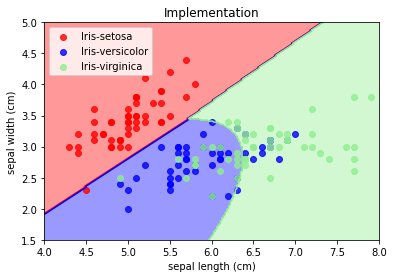

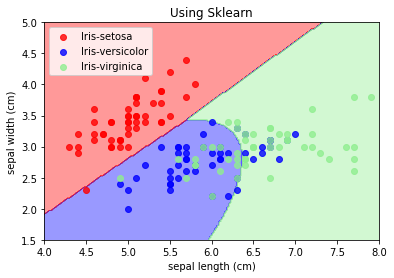

In [13]:
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
import seaborn as sns
import itertools

X1 = iris_f[['sepal length (cm)','sepal width (cm)']].to_numpy()
names = iris_f['name'].to_numpy()
names[names == 'Iris-setosa'] = 0
names[names == 'Iris-versicolor'] = 1
names[names == 'Iris-virginica'] = 2
y1 = names.astype('int')

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

df1 = iris_f[['sepal length (cm)','sepal width (cm)', 'name']]

#Estimating the parameters
mu_list = np.split(df1.groupby('name').mean().values,[1,2])
sigma_list = np.split(df1.groupby('name').cov().values,[2,4], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 200
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['red', 'blue', 'lightgreen', 'gray', 'cyan']

#Computing the predicted class function for each value on the grid
zz = np.array( [predict_QDA_class( np.array([xx,yy]).reshape(-1,1), mu_list, sigma_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
plt.contourf(X, Y, Z, 2, alpha = .4, colors = ('red', 'blue', 'lightgreen'))
plt.contour(X, Y, Z, 2, alpha = 1, colors = ('red', 'blue', 'lightgreen'))

# показать образцы классов
for color, i, target_name in zip(color_list, [0, 1, 2], target_names):
    plt.scatter(X1[y1 == i, 0], X1[y1 == i, 1], alpha=.8, color=color, label=target_name)

# Addd axis and title
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Implementation')
plt.legend(loc='upper left')
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()


from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X2 = iris_f[['sepal length (cm)','sepal width (cm)']].to_numpy()
names = iris_f['name'].to_numpy()
names[names == 'Iris-setosa'] = 0
names[names == 'Iris-versicolor'] = 1
names[names == 'Iris-virginica'] = 2
y2 = names.astype('int')

model2 = QuadraticDiscriminantAnalysis()
model2.fit(X2, y2)

plot_decision_regions(X2, y2, target_names, classifier=model2)
plt.title("Using Sklearn")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(loc='upper left')
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

Как видим, оба метода дают одинаковые результаты в интересующей нас области.